In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pprint
import missingno as msno

In [2]:
from lifelines import KaplanMeierFitter
from lifelines.utils import datetimes_to_durations

In [3]:
import altair as alt

In [4]:
def open_table_list_columns(table):
    table = pd.read_csv('/volumes/ellieking/Checked/'+table+'.csv', dtype=object)
    pp = pprint.PrettyPrinter()
    pp.pprint(list(table.columns))
    return table

### client table

In [5]:
client = open_table_list_columns('Client')

['Serial',
 'CurrentEpisode',
 'Status',
 'Service',
 'ProjectCode',
 'Gender',
 'Nationality',
 'RelationshipStatus',
 'Ethnic_Origin',
 'Religion',
 'Sexuality',
 'NoFixedAbode',
 'Scrip_Index',
 'Alert',
 'CurrentKeyworker',
 'CaseNumber',
 'Office']


## Discharge

In [6]:
discharge = open_table_list_columns('Discharge')

['DischargeID',
 'Serial',
 'Episode',
 'EventID',
 'DischargeDate',
 'DateStarted',
 'LetterToGP',
 'LetterToClient',
 'ModalityStatusCode',
 'ReasonForClosure',
 'Agency',
 'YPSelfHarmExit',
 'YPUnsafeDrugExit',
 'YPOffendingExit',
 'YPCAFExit',
 'YPSaferSexExit',
 'YPSexualHealthExit',
 'YPRegisteredGPExit',
 'YPGoalsExit',
 'DischargeDestination',
 'YPLeadProfessionalExit',
 'YPMHServicesExit',
 'YPYOTExit',
 'YPSexualExploitationExit',
 'YPContactLearningDifficultyTreatExit',
 'YPSexuallyActiveTreatExit',
 'EngagedInUnsafeSexAtTrtmntEnd',
 'YPFreqOfUseOfDrug1AtTrtmntExit',
 'ChildProtectionIssues',
 'PlannedDateOfRecordRemoval',
 'NDTMSDischargeDate',
 'NDTMSReasonForClosure',
 'NDTMSDischargeEventID',
 'PrisonExitReason',
 'PrisonExitDestination',
 'ReferredTo',
 'PreReleaseReviewDate',
 'YPOfferedSupportFromOtherServices',
 'DateOfDeath',
 'AUDITScore',
 'ImmunisationsAdministered',
 'CounsellingDelivered',
 'ClientCommittedSuicide',
 'MentalHealthProblem',
 'CareStatusAtTreatme

In [7]:
discharge_codes_df = pd.read_csv('/Users/ellieking/Downloads/discharge_codes - Sheet1.csv', dtype=object)

In [8]:
discharge_codes = pd.Series(discharge_codes_df.Text.values,index=discharge_codes_df.Code).to_dict()

In [9]:
code = ("80","81","82","83","84","85","86","87","88","89","93","94","95","96","97","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31","32","33","34","35","36","37","38","39","40","41","42","43","44","45","46","47","48","49","50","51","52","53","54","55","56","57","58","59","60","61","62","63","64","65","66","67","68","69","70","90","91","85","88","82","85","80","84","85","83","89","13","86","87","610","600","601","602","604","605","606","611","612","613","614","615","616","617","618","619","603","607","608","609","622","620","621","623","624","625","98","99") 
outcome = ("S","S","S","N","N","U","U","N","U","U","N","N","N","N","N","S","S","U","U","N","U","N","N","U","U","U","U","U","N","S","S","S","S","S","S","S","S","S","S","S","S","S","S","U","U","U","U","U","U","U","U","U","U","U","U","U","U","U","U","U","U","U","U","U","N","N","N","N","N","N","N","U","U","U","U","U","U","U","U","U","U","U","U","U","U","S","S","U","U","S","U","S","N","U","N","U","U","U","N","S","N","U","N","N","U","U","U","U","U","U","U","U","U","U","U","U","U","N","S","U","U","U","U","U","N","U")

code_outcomes = dict(zip(code, outcome))

In [10]:
discharge['discharge_reason'] = discharge['NDTMSReasonForClosure'].map(discharge_codes).astype('category')

In [11]:
discharge['outcome'] = discharge['NDTMSReasonForClosure'].map(code_outcomes).astype('category')

### need to add episode info to features

In [12]:
episode = open_table_list_columns('Episode')

['Serial',
 'Episode',
 'StartDate',
 'EndDate',
 'Agency',
 'Tier2',
 'Tier3',
 'Tier4']


In [13]:
episode.head()

,Serial,Episode,StartDate,EndDate,Agency,Tier2,Tier3,Tier4
0,1448335,1,May 16 2009 12:00AM,Aug 24 2009 12:00AM,Dundee,0,0,0
1,1369062,1,Jul 9 2009 12:00AM,Oct 17 2009 12:00AM,Dundee,0,1,0
2,568952,1,Aug 3 2009 12:00AM,Sep 25 2009 12:00AM,Training,0,0,0
3,1230120,1,Jul 16 2009 12:00AM,Jan 22 2010 12:00AM,Dundee,0,0,0
4,1230120,2,Feb 15 2011 12:00AM,Mar 8 2011 12:00AM,Dundee,0,0,0


Tier2 = structured treatmnet -regular 1to1 sessions
Tier3 = unstructured -dropin to group work
Tier4 = signposting

In [14]:
episode.shape

(286376, 8)

In [15]:
episode.Serial.nunique()

191212

In [16]:
sum(episode.EndDate.isna())

16201

In [17]:
sum(episode.EndDate.isna())/episode.Serial.nunique()

0.08472794594481518

Less than 10% of episodes with missing end date (presumed to be in ongoing treatment?)

In [18]:
type(episode.EndDate[0])

str

In [19]:
episode['start_date'] = pd.to_datetime(episode.StartDate)

In [20]:
episode['end_date'] = pd.to_datetime(episode.EndDate)

In [26]:
episode = episode.drop(['StartDate', 'EndDate'], axis=1).copy()

In [27]:
episode['episode_duration'] = episode.end_date - episode.start_date

In [28]:
episode.head()

,Serial,Episode,Agency,Tier2,Tier3,Tier4,start_date,end_date,episode_duration
0,1448335,1,Dundee,0,0,0,2009-05-16,2009-08-24,100 days
1,1369062,1,Dundee,0,1,0,2009-07-09,2009-10-17,100 days
2,568952,1,Training,0,0,0,2009-08-03,2009-09-25,53 days
3,1230120,1,Dundee,0,0,0,2009-07-16,2010-01-22,190 days
4,1230120,2,Dundee,0,0,0,2011-02-15,2011-03-08,21 days


In [29]:
episode['Tier2'].value_counts()

0    185814
1    100562
Name: Tier2, dtype: int64

In [30]:
episode['Tier2'].value_counts(normalize=True)

0    0.648846
1    0.351154
Name: Tier2, dtype: float64

In [31]:
episode['Tier3'].value_counts()

0    171942
1    114434
Name: Tier3, dtype: int64

In [32]:
episode['Tier3'].value_counts(normalize=True)

0    0.600406
1    0.399594
Name: Tier3, dtype: float64

In [33]:
episode['Tier4'].value_counts()

0    286322
1        54
Name: Tier4, dtype: int64

In [34]:
episode['Tier4'].value_counts(normalize=True)

0    0.999811
1    0.000189
Name: Tier4, dtype: float64

In [35]:
35+41

76

In [36]:
episode.Tier2.dtype

dtype('O')

What does it mean if all Tiers are 0?

In [37]:
len(episode[(episode['Tier2'] == '0') & (episode['Tier3'] == '0') & (episode['Tier4'] == '0')])

112422

In [38]:
len(episode[(episode['Tier2'] == '0') & (episode['Tier3'] == '0') & (episode['Tier4'] == '0')])/episode.shape[0] *100

39.256781294521886

In [39]:
38 + 41 + 35 

114

In [40]:
len(episode[(episode['Tier2'] == '1') & (episode['Tier3'] == '1')])/episode.shape[0] *100

14.338142861133615

In [41]:
type(episode['episode_duration'][0])

pandas._libs.tslib.Timedelta

In [42]:
len(episode[episode['episode_duration'] < pd.Timedelta(0)])

537

In [43]:
print("percent of episodes with start date after end date: {}".format(len(episode[episode['episode_duration'] < pd.Timedelta(0)])/episode.shape[0] *100))

percent of episodes with start date after end date: 0.18751571360728553


537 episodes have a start date after the end date. These could be:  
1) removed from data  
2) reversed, assuming data entry
3) Manually checked and errors determined
4) checked with source for data entry errors


For now remove these episodes as they only represent 0.19% of data

          KM_estimate
timeline             
0.0          1.000000
1.0          0.986450
2.0          0.978514
3.0          0.971154
4.0          0.964021
5.0          0.957306
6.0          0.948650
7.0          0.935275
8.0          0.925522
9.0          0.918501
10.0         0.911924
11.0         0.905507
12.0         0.898808
13.0         0.889886
14.0         0.877345
15.0         0.868356
16.0         0.861378
17.0         0.855084
18.0         0.848893
19.0         0.842277
20.0         0.833769
21.0         0.822421
22.0         0.813913
23.0         0.807710
24.0         0.801754
25.0         0.795874
26.0         0.789767
27.0         0.781580
28.0         0.770630
29.0         0.762551
...               ...
8538.0       0.000123
8548.0       0.000119
8620.0       0.000115
8640.0       0.000111
8707.0       0.000107
8732.0       0.000103
8741.0       0.000099
8770.0       0.000095
8865.0       0.000091
8875.0       0.000087
8879.0       0.000083
8907.0       0.000080
8914.0    

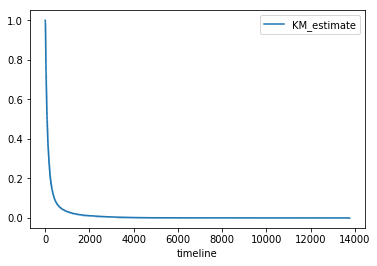

In [47]:
episode = episode[episode['episode_duration'] > pd.Timedelta(0)].copy()

T, E = datetimes_to_durations(episode.start_date, episode.end_date)

kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)

print(kmf.survival_function_)
print(kmf.median_)
kmf.plot()

Median number of days in service for Tier2: 81.0
Median number of days in service for Tier3: 80.0
Median number of days in service for Tier4: 79.0


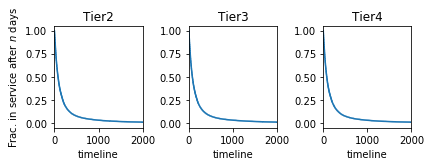

In [59]:
tiers = episode[['Tier2', 'Tier3', 'Tier4']]
episode['tiers'] = pd.Series(tiers.columns[np.where(tiers!=0)[1]])

tiers = episode['tiers'].unique()

for i,tier in enumerate(tiers):
    ax = plt.subplot(2, 3, i+1)
    ix = episode['tiers'] == tier
    kmf.fit( T[ix], E[ix], label=tier)
    print('Median number of days in service for {}: {}'.format(tier, kmf.median_))
    kmf.plot(ax=ax, legend=False)
    plt.title(tier)
    plt.xlim(0, 2000)
    if i==0:
        plt.ylabel('Frac. in service after $n$ days')
plt.tight_layout()

In [60]:
episode['episode_duration'].describe()

count                      251511
mean     195 days 02:27:39.477319
std      430 days 07:05:30.108368
min               1 days 00:00:00
25%              32 days 00:00:00
50%              80 days 00:00:00
75%             188 days 00:00:00
max           13767 days 00:00:00
Name: episode_duration, dtype: object

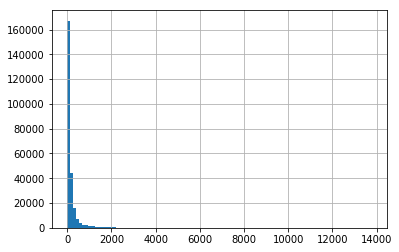

In [61]:
(episode['episode_duration'] / pd.Timedelta(days=1)).hist(bins =100)

In [62]:
len(episode[episode['episode_duration'] > pd.Timedelta(weeks=520)])

770

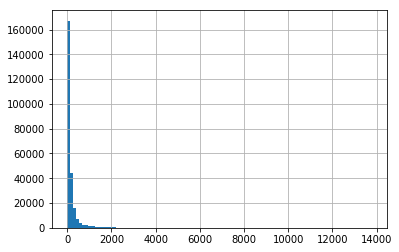

In [63]:
(episode['episode_duration'] / pd.Timedelta(days=1)).hist(bins =100)

In [64]:
last3years = episode[episode['start_date'] > '2015-01-01']

In [65]:
last3years.shape

(74172, 10)

In [66]:
len(last3years[(last3years['Tier2'] == '1') & (last3years['Tier3'] == '1')])/last3years.shape[0] *100

16.0721026802567

### Join episode to discharge

In [83]:
epi_discharge = pd.merge(discharge, 
                         episode, 
                         on=['Serial',   'Episode'], 
                         how='outer', 
                         indicator=True, 
                         validate="1:1"
                        )

In [84]:
epi_discharge_left = pd.merge(episode,
                         discharge,
                         on=['Serial', 'Agency',  'Episode'], 
                         how='left', 
                         indicator=True, 
                         validate="1:1"
                        )

In [85]:
epi_discharge_left.groupby('_merge').size()

_merge
left_only        178
right_only         0
both          251333
dtype: int64

In [86]:
epi_discharge.columns

Index(['DischargeID', 'Serial', 'Episode', 'EventID', 'DischargeDate',
       'DateStarted', 'LetterToGP', 'LetterToClient', 'ModalityStatusCode',
       'ReasonForClosure', 'Agency_x', 'YPSelfHarmExit', 'YPUnsafeDrugExit',
       'YPOffendingExit', 'YPCAFExit', 'YPSaferSexExit', 'YPSexualHealthExit',
       'YPRegisteredGPExit', 'YPGoalsExit', 'DischargeDestination',
       'YPLeadProfessionalExit', 'YPMHServicesExit', 'YPYOTExit',
       'YPSexualExploitationExit', 'YPContactLearningDifficultyTreatExit',
       'YPSexuallyActiveTreatExit', 'EngagedInUnsafeSexAtTrtmntEnd',
       'YPFreqOfUseOfDrug1AtTrtmntExit', 'ChildProtectionIssues',
       'PlannedDateOfRecordRemoval', 'NDTMSDischargeDate',
       'NDTMSReasonForClosure', 'NDTMSDischargeEventID', 'PrisonExitReason',
       'PrisonExitDestination', 'ReferredTo', 'PreReleaseReviewDate',
       'YPOfferedSupportFromOtherServices', 'DateOfDeath', 'AUDITScore',
       'ImmunisationsAdministered', 'CounsellingDelivered',
       'Client

In [87]:
epi_discharge.groupby('_merge').size()

_merge
left_only      19951
right_only         0
both          251511
dtype: int64

In [88]:

epi_discharge = epi_discharge.drop('_merge', axis=1).copy()

In [89]:
epi_discharge['discharge_date'] = pd.to_datetime(epi_discharge.DischargeDate)

In [90]:
sum(epi_discharge.discharge_date == epi_discharge.end_date)

251507

In [97]:
sum(epi_discharge.discharge_date != epi_discharge.end_date)

19955

In [99]:
sum(epi_discharge['start_date'] > epi_discharge['end_date'])

0

In [104]:
sum(epi_discharge.discharge_date.isna())

732

In [105]:
sum(epi_discharge.end_date.isna())

19951

In [102]:
T, E = datetimes_to_durations(epi_discharge.start_date, epi_discharge.discharge_date)

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/lifelines/utils/__init__.py:373: UserWarning: Warning: some values of start_times are after end_times
  warnings.warn("Warning: some values of start_times are after end_times")


In [107]:
T = epi_discharge.episode_duration
E = np.where(epi_discharge.discharge_date.isna(), 0, 1 )

TypeError: NaNs were detected in the duration_col and/or the event_col

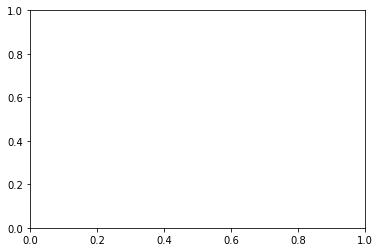

In [108]:
ax = plt.subplot(111)

kmf.fit(T[epi_discharge["outcome"] == "S"], event_observed=E[epi_discharge["outcome"] == "S"], 
        label="successful outcome")
kmf.plot(ax=ax, ci_force_lines=True)
kmf.fit(T[epi_discharge["outcome"] == "U"], event_observed=E[epi_discharge["outcome"] == "U"], 
        label="unsuccessful outcome")
kmf.plot(ax=ax, ci_force_lines=True)
kmf.fit(T[epi_discharge["outcome"] == "N"], event_observed=E[epi_discharge["outcome"] == "N"], 
        label="neutral outcome")
kmf.plot(ax=ax, ci_force_lines=True)

plt.ylim(0, 1);
plt.title("Time in service by outcome success");

### Join client to epi_dicharge

In [ ]:
client_epi_disch = pd.merge(client, 
                         epi_discharge, 
                         on=['Serial'], 
                         how='outer', 
                         indicator=True, 
                         validate="1:m"
                        )

In [ ]:
client_epi_disch.groupby('_merge').size()

In [ ]:
pd.crosstab(client_epi_disch['disch_not_epi'], client_epi_disch['_merge'])

In [ ]:
pd.crosstab(client_epi_disch['disch_not_epi'], client_epi_disch['Status'])

In [ ]:
client_epi_disch['client_not_epi_disch'] = client_epi_disch['_merge']
client_epi_disch = client_epi_disch.drop('_merge', axis=1).copy()

### Join referrals to client_epi_dicharge

In [ ]:
referral = open_table_list_columns('Referral')

In [ ]:
ref_client_epi_disch = pd.merge(referral, 
                         client_epi_disch, 
                         on=['Serial', 'Episode'], 
                         how='outer', 
                         indicator=True, 
                         validate="1:m"
                        )

In [ ]:
ref_client_epi_disch.groupby('_merge').size()

In [ ]:
ref_client_epi_disch.shape

In [ ]:
pp = pprint.PrettyPrinter()
pp.pprint(list(ref_client_epi_disch.columns))
    

In [ ]:
msno.matrix(ref_client_epi_disch[['ReferralID',
 'Serial',
 'Episode',
 'ReferrerID',
 'Organisation',
 'IsPrimary',
 'ReferralSource',
 'ReferralDate',
 'ReferralMadeDate',
 'ReferredModalityDate',
 'ReferralRoute',
 'AssessmentDate',
 'ReferredModalities',
 'AssessmentAgency',
 'TreatmentReferredOption1',
 'TreatmentReferredOption2',
 'TreatmentReferredOption3',
 'TreatmentReferredOptionOther',
 'PresentingProblem',
 'CurrentEpisode',
 'Status',
 'Service',
 'ProjectCode',
 'Gender',
 'outcome']].sample(250))
    

In [ ]:
msno.matrix(ref_client_epi_disch[['Nationality',
 'RelationshipStatus',
 'Ethnic_Origin',
 'Religion',
 'Sexuality',
 'NoFixedAbode',
 'Scrip_Index',
 'Alert',
 'CurrentKeyworker',
 'CaseNumber',
 'Office',
 'DischargeID',
 'EventID',
 'DischargeDate',
 'DateStarted',
 'LetterToGP',
 'LetterToClient',
 'ModalityStatusCode',
 'ReasonForClosure',
 'Agency_x',
 'YPSelfHarmExit',
 'YPUnsafeDrugExit',
 'YPOffendingExit',
 'YPCAFExit',
 'YPSaferSexExit',
 'YPSexualHealthExit',
 'YPRegisteredGPExit',
 'YPGoalsExit',
 'DischargeDestination',
 'YPLeadProfessionalExit',
 'YPMHServicesExit',
 'YPYOTExit',
 'outcome']].sample(3000))
    

In [ ]:
msno.matrix(ref_client_epi_disch[['YPSexualExploitationExit',
 'YPContactLearningDifficultyTreatExit',
 'YPSexuallyActiveTreatExit',
 'EngagedInUnsafeSexAtTrtmntEnd',
 'YPFreqOfUseOfDrug1AtTrtmntExit',
 'ChildProtectionIssues',
 'PlannedDateOfRecordRemoval',
 'NDTMSDischargeDate',
 'NDTMSReasonForClosure',
 'NDTMSDischargeEventID',
 'PrisonExitReason',
 'PrisonExitDestination',
 'ReferredTo',
 'PreReleaseReviewDate',
 'YPOfferedSupportFromOtherServices',
 'DateOfDeath',
 'AUDITScore',
 'ImmunisationsAdministered',
 'CounsellingDelivered',
 'ClientCommittedSuicide',
 'MentalHealthProblem',
 'CareStatusAtTreatmentExit',
 'DomesticAbuseAtTreatmentExit',
 'EducationEmploymentTrainingStatus',
 'AccommodationNeedAtTreatmentExit',
 'PregnantAtTreatmentExit',
 'ParentalStatusAtTreatmentExit',
 'ChildProtectionPlanAtTreatmentExit',
 'FeelAffectedBySubstanceMisuseAtTreatmentExit',
 'SexualRiskTakingAtTMExit',
 'GangInvolvementAtTMExit',
 'FemaleGenitalMutilationAtTMExit',
 'AsylumRefugeesAtTMExit',
 'AtRiskOfExclusion',
 'Sentenced',
 'discharge_reason',
 'outcome',
 'Agency_y',
 'Tier2',
 'Tier3',
 'Tier4',
 'start_date',
 'end_date',
 'episode_duration',
 'disch_not_epi',
 'client_not_epi_disch']].sample(3000))
    

In [ ]:
msno.heatmap(ref_client_epi_disch, fontsize=8)

In [ ]:
msno.dendrogram(ref_client_epi_disch, orientation='left')

In [ ]:
ref_client_epi_disch['ReferralRoute'].value_counts()
#ref_client_epi_disch['ReferralSource'].sum().sort_values(ascending=True).plot(kind = 'barh', figsize=(10, 5))

In [ ]:
ref_client_epi_disch[['outcome','ReferralRoute']].groupby(['outcome','ReferralRoute']).size().sort_values(ascending=True).plot(kind = 'barh', figsize=(10, 5))
#ref_client_epi_disch['ReferralSource'].sum().sort_values(ascending=True).plot(kind = 'barh', figsize=(10, 5))

In [ ]:
def plot_time_metric_byvar(df, metric, byvar):
    grouped = df.groupby([byvar, pd.Grouper(freq='D')])[metric].sum()
    by_day = grouped.unstack(byvar, fill_value=0)
    top = by_day.iloc[:, by_day.columns.isin(by_day.min().sort_values(ascending=False)[:10].index)]
    bottom = by_day.iloc[:, by_day.columns.isin(by_day.min().sort_values()[:10].index)]
    
    ax = top.plot()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_ylabel(metric)
    ax.set_xlabel('Date')
    ax.set_title('Top 10 {}s for {}'.format(byvar, metric))
    
    ay = bottom.plot()
    ay.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ay.set_ylabel(metric)
    ay.set_xlabel('Date')
    ay.set_title('Bottom 10 {}s for {}'.format(byvar, metric))

    return ax, ay

In [ ]:
client_epi_disch['count'] = 1

In [ ]:
client_epi_disch.index = client_epi_disch.end_date

In [ ]:
grouped = client_epi_disch.groupby(['outcome', pd.Grouper(freq='Y')]).count()
    

In [ ]:
ax = grouped.unstack(level='outcome')['count'].plot()
ax

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
careplan = open_table_list_columns('Careplan')

In [ ]:
careplan.head()

In [ ]:
events1 = open_table_list_columns('Events_01')

In [ ]:
events1

In [ ]:
events2 =  open_table_list_columns('Events_02')

In [ ]:
events2.shape

In [ ]:
events3 = open_table_list_columns('Events_03')

In [ ]:
events3.shape

In [ ]:
events_join = pd.merge(events1,
                         events2,
                         on=['Serial', 'EventID'], 
                         how='outer', 
                         indicator=True, 
                         validate="1:1"
                        )

In [ ]:
events_join['_merge'].value_counts()

In [ ]:
import glob, os   


path = '/volumes/ellieking/Checked/'                     # use your path
all_files = glob.glob(os.path.join(path, "Events_*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f, dtype=object, encoding = "iso-8859-1") for f in all_files)
events   = pd.concat(df_from_each_file, ignore_index=True)



In [ ]:
events.shape

In [ ]:
events.columns

In [ ]:
events.EventID.nunique()

In [ ]:
events.Serial.nunique()

In [ ]:
print('On average the are {} events per Serial'.format(
    events.EventID.nunique()/events.Serial.nunique()))

In [ ]:
events.groupby('EventID')['EventDate'].nunique().describe()

Each row is a unique event and all events have only one eventdate

In [ ]:
events_types2 = open_table_list_columns('EventsTypes_02')

In [ ]:

all_files_type = glob.glob(os.path.join(path, "EventsTypes_*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file_type = (pd.read_csv(f, dtype=object, encoding = "iso-8859-1") for f in all_files_type)
events_types   = pd.concat(df_from_each_file_type, ignore_index=True)



In [ ]:
events_types.shape

In [ ]:
events_types.head(20)

In [ ]:
events_types.EventID.nunique()

In [ ]:
events_types.ID.nunique()

In [ ]:
events_types.EventType.nunique()

In [ ]:
events_types.EventName.nunique()

In [ ]:
events_types.groupby('EventID')['ID'].nunique().describe()

In [ ]:
events_types.ID.nunique()/events_types.EventID.nunique()

In [ ]:
harm_reduction = open_table_list_columns('HarmReduction')

In [ ]:
harm_reduction.head()

In [ ]:
modality = open_table_list_columns('Modality')

In [ ]:
modality.head()

### referral

In [ ]:
referral = open_table_list_columns('Referral')

In [ ]:
referral_discharge = pd.merge(referral,
                         discharge,
                         on=['Serial', 'Episode'], 
                         how='outer', 
                         indicator=True, 
                         validate="1:1"
                        )

In [ ]:
referral_discharge.groupby('_merge').size()

In [ ]:
referral_episode = pd.merge(referral,
                         episode,
                         on=['Serial', 'Episode'], 
                         how='outer', 
                         indicator=True, 
                         validate="1:1"
                        )

In [ ]:
referral_episode.groupby('_merge').size()

In [ ]:
14915 +19951

In [ ]:
referral.head()

In [ ]:
risk = open_table_list_columns('RiskAssessment')

In [ ]:
risk.head()

In [ ]:
scripts = open_table_list_columns('Scripts_3')

In [ ]:
tag_manager = open_table_list_columns('TagManager')

In [ ]:
tag_manager.head()

In [ ]:
top = open_table_list_columns('TOP')

In [ ]:
top.head()

In [ ]:
top_plus = open_table_list_columns('TOPPlus')

In [ ]:
top_plus.head()

In [ ]:
open_table_list_columns('ClientInformationReview')

In [ ]:
open_table_list_columns('ClientInjectingHistory')

In [ ]:
open_table_list_columns('ClientSocial')

In [ ]:
open_table_list_columns('ClientSubstanceAnalysis')

In [ ]:
open_table_list_columns('ClientSubstanceType')

In [ ]:
events_types1 = open_table_list_columns('EventsTypes_01')

In [ ]:
events_types2 = open_table_list_columns('EventsTypes_02')

In [ ]:
events_join2 = pd.merge(events1,
                         events_types1,
                         on=['EventID'], 
                         how='outer', 
                         indicator=True, 
                         validate="1:m"
                        )

In [ ]:
events_join2['_merge'].value_counts()